<a href="https://colab.research.google.com/github/skeleton111222/Extracting-text-from-images/blob/main/Extracting_text_from_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracting-text-from-images**

# **Commands for Linux (including Google Colab).**

In [1]:
!pip install opencv-python
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


# **Imports**

In [2]:
# Import necessary libraries
import cv2
import pytesseract
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

* `cv2` : image processing (read, resize, preprocess)

*  `pytesseract` : extract text from images (OCR)

*  `plt` : display images/plots

*  `cv2_imshow` : show images in Google Colab (use instead of cv2.imshow)

# **Import File**

In [3]:
# Import the file(image)
image_path = "/content/OIP.webp"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

*  ` image_path = "/content/OIP.webp"` : Stores the file path of the image.

*  ` image = cv2.imread(image_path)` : Loads the image into OpenCV (in BGR color format).

*  `image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)` : Converts the image from BGR → RGB so it displays correctly (for matplotlib or Colab).

# **Display the original image**

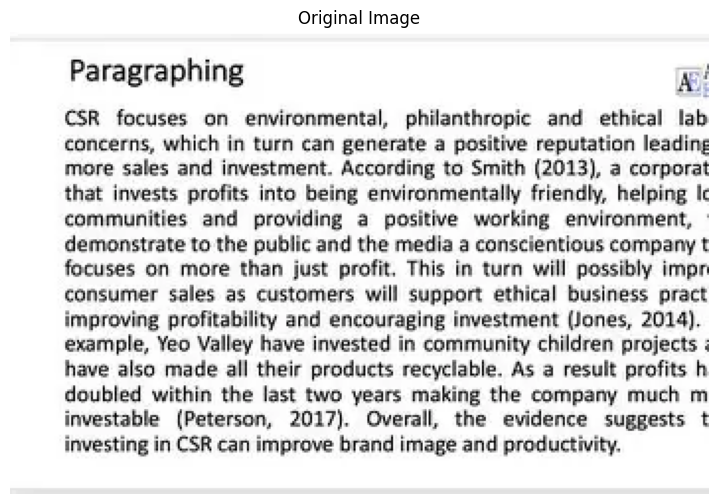

In [4]:
# Display the original image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

*  `plt.figure(figsize=(10, 6))` : Sets the display size (width, height in inches)
*  `plt.imshow(image_rgb)` : Show the image
*  `plt.title("Original Image")` : Provide title to the image
*  `plt.axis("off")` : Hide axis
*  `plt.show()` : Render the image

# **Grayscale the image (optional)**

Grayscale Image:


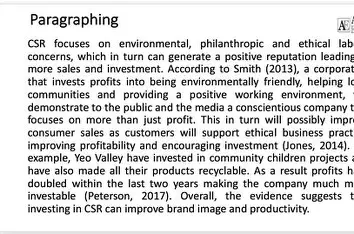

In [5]:
# Grayscale the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Grayscale Image:")
cv2_imshow(gray)

*  `gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)` : Convert original image to grayscale image and store in gray variable
*  `print("Grayscale Image:")` : Print Grayscale Image
*  `cv2_imshow(gray)` : Show the grayscaled image

# **Extract text**

In [6]:
# Extract text from the image
extracted_text = pytesseract.image_to_string(image_rgb)
print(" Extracted Text:\n")
print(extracted_text)

 Extracted Text:

Paragraphing Ez

CSR focuses on environmental, philanthropic and ethical lab
concerns, which in turn can generate a positive reputation leading
more sales and investment. According to Smith (2013), a corpora
that invests profits into being environmentally friendly, helping |
communities. and providing a positive working environment,
demonstrate to the public and the media a conscientious company t
focuses on more than just profit. This in turn will possibly impr
consumer sales as customers will support ethical business pract
improving profitability and encouraging investment (Jones, 2014).
example, Yeo Valley have invested in community children projects
hhave also made all their products recyclable. As a result profits h
doubled within the last two years making the company much m
investable (Peterson, 2017). Overall, the evidence suggests t
investing in CSR can improve brand image and productivity.

 



*  `extracted_text = pytesseract.image_to_string(image_rgb)` : Reads the image using **Tesseract OCR** and extracts all the text from it as a string and store in extracted_text.
*  `print(" Extracted Text:\n")` : Prints Extracted Text (as a Heading)
*  `print(extracted_text)` : Prints the extracted texts

# **Draw boxes around detected text (optional)**

In [7]:
# Draw bounding boxes around detected text
data = pytesseract.image_to_data(image_rgb, output_type=pytesseract.Output.DICT)

n_boxes = len(data['level'])
for i in range(n_boxes):
    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 0, 0), 2)

  ```python
  data = pytesseract.image_to_data(image_rgb, output_type=pytesseract.Output.DICT)
  ```

  * Runs OCR **and returns detailed info** about each detected text box.
  * `data` is a dictionary containing:

    * `'left', 'top', 'width', 'height'` : box coordinates
    * `'text'` : recognized text
    * `'conf'` : confidence score

  ```python
  n_boxes = len(data['level'])
  for i in range(n_boxes):
      (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
      cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 0, 0), 2)
  ```

  * Loops through all detected text boxes.
  * Extracts **coordinates and size** of each box.
  * Draws a **black rectangle** around the text on the image.
    * `(0, 0, 0)` : color (black)
    * `2` : thickness of rectangle


# **Show the bounded image**

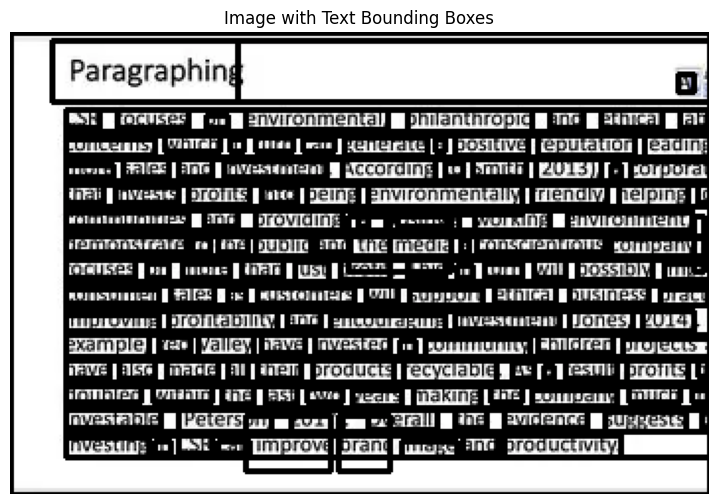

In [8]:
# Show the image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Image with Text Bounding Boxes")
plt.axis("off")
plt.show()

*  `plt.figure(figsize=(10, 6))` : Sets the display size (width, height in inches)
*  `plt.imshow(image_rgb)` : Show the image
*  `plt.title("Image with Text Bounding Boxes")` : Provide title to the image
*  `plt.axis("off")` : Hide axis
*  `plt.show()` : Render the image